__Regression__

__Question 1.__ Fit a polynomial LinearRegression model on the training data X_train for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
    
degree_predictions = np.zeros((4,100))
    
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

    
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

    
X_train = X_train.reshape(-1,1)
    
degrees = [1, 3, 6, 9]
x_pred = np.linspace(0, 10, 100).reshape(-1,1)
    
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)
    x_pred_poly = poly.fit_transform(x_pred)
        
    linreg = LinearRegression().fit(X_poly, y_train)
        
    y_pred = linreg.predict(x_pred_poly)
    degree_predictions[i, :] = y_pred
        
print(degree_predictions[:1])

[[0.2530402  0.26920155 0.2853629  0.30152425 0.3176856  0.33384695
  0.35000831 0.36616966 0.38233101 0.39849236 0.41465371 0.43081507
  0.44697642 0.46313777 0.47929912 0.49546047 0.51162182 0.52778318
  0.54394453 0.56010588 0.57626723 0.59242858 0.60858994 0.62475129
  0.64091264 0.65707399 0.67323534 0.6893967  0.70555805 0.7217194
  0.73788075 0.7540421  0.77020345 0.78636481 0.80252616 0.81868751
  0.83484886 0.85101021 0.86717157 0.88333292 0.89949427 0.91565562
  0.93181697 0.94797832 0.96413968 0.98030103 0.99646238 1.01262373
  1.02878508 1.04494644 1.06110779 1.07726914 1.09343049 1.10959184
  1.1257532  1.14191455 1.1580759  1.17423725 1.1903986  1.20655995
  1.22272131 1.23888266 1.25504401 1.27120536 1.28736671 1.30352807
  1.31968942 1.33585077 1.35201212 1.36817347 1.38433482 1.40049618
  1.41665753 1.43281888 1.44898023 1.46514158 1.48130294 1.49746429
  1.51362564 1.52978699 1.54594834 1.56210969 1.57827105 1.5944324
  1.61059375 1.6267551  1.64291645 1.65907781 1.67

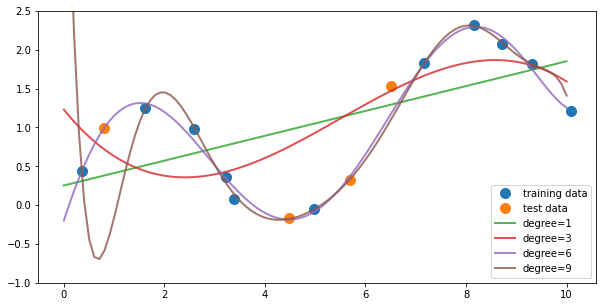

In [2]:
plt.figure(figsize=(10,5))
plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plt.show()


__Question 2.__ Fit a polynomial LinearRegression model on the training data X_train for degrees 0 through 9. For each model compute the 𝑅2 (coefficient of determination) regression score on the training data as well as the the test data.

In [3]:
from sklearn.metrics import r2_score

X_test = X_test.reshape(-1,1)

r2_train = np.array([])
r2_test = np.array([])
    
for degree in range(10):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
        
    linreg = LinearRegression().fit(X_train_poly, y_train)
        
    train_score = linreg.score(X_train_poly, y_train)
    test_score = linreg.score(X_test_poly, y_test)
        
    r2_train = np.append(r2_train, train_score)
    r2_test = np.append(r2_test, test_score)
        
print (r2_train, r2_test)
        

[0.         0.42924578 0.4510998  0.58719954 0.91941945 0.97578641
 0.99018233 0.99352509 0.99637545 0.99803706] [-0.47808642 -0.45237104 -0.06856984  0.00533105  0.73004943  0.87708301
  0.9214094   0.92021504  0.63247947 -0.64525273]


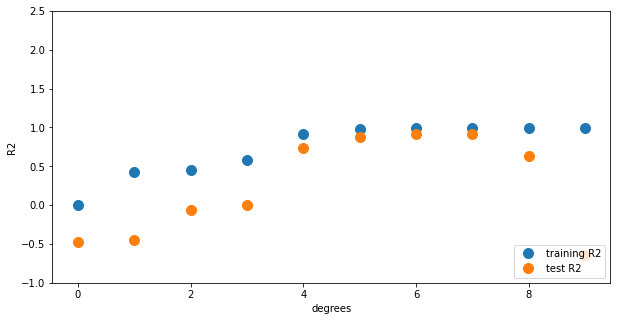

In [4]:
# Plotting the r2 values

degrees = np.arange(10)
plt.figure(figsize=(10,5))
plt.plot(degrees, r2_train, 'o', label='training R2', markersize=10)
plt.plot(degrees, r2_test, 'o', label='test R2', markersize=10)
plt.ylim(-1,2.5)
plt.legend(loc=4)
plt.ylabel('R2')
plt.xlabel('degrees')
plt.show()

This plot shows that degree levels 0 through 3 correspond to a model that is underfitting. Similarly, degree 8 through 9 correspond to a model that is overfitting. Degrees 4 through 7 correspond to a model with good generalization performance.

__Question 4.__ Training models on high degree polynomial features can result in overfitting. Train two models: a non-regularized LinearRegression model and a Lasso Regression model (with parameters alpha=0.01, max_iter=10000, tol=0.1) on polynomial features of degree 12. Find the 𝑅2 score for LinearRegression and Lasso model's test sets.

In [5]:
from sklearn.linear_model import Lasso

poly = PolynomialFeatures(12)
    
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
    
# Linear regression
    
linreg = LinearRegression().fit(X_train_poly, y_train)
LinearRegression_R2_test_score = linreg.score(X_test_poly, y_test)
    
# Lasso regression
linlasso = Lasso(alpha=0.01, max_iter = 10000, tol = 0.1).fit(X_train_poly, y_train)
Lasso_R2_test_score = linlasso.score(X_test_poly, y_test)
    
print(LinearRegression_R2_test_score, Lasso_R2_test_score)
    

-4.311990509982749 0.6051396919570049


__Classification__

__Question 5.__ Use [mushrooms.csv](https://archive.ics.uci.edu/dataset/73/mushroom) dataset. Using X_train and y_train from as shown below, train a DecisionTreeClassifier with default parameters and random_state=0. Print the 5 most important features found by the decision tree.

In [6]:
from sklearn.tree import DecisionTreeClassifier
    
mush_df = pd.read_csv('mushrooms.csv')
mush_df2 = pd.get_dummies(mush_df)
    
X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]


X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)
    
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train2, y_train2)
    
imp = clf.feature_importances_
    
feature_importances_pairs = list(zip(X_train2.columns, imp))
    
sorted_features = sorted(feature_importances_pairs, key=lambda x: x[1], reverse = True)
    
top5_features = [feature for feature, imp in sorted_features[:5]]
    
print(top5_features)

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']


__Question 6.__ For this question, use the validation_curve function in sklearn.model_selection to determine training and test scores for a Support Vector Classifier (SVC) with varying parameter values.

Create an SVC with default parameters (i.e. kernel='rbf', C=1) and random_state=0. Recall that the kernel width of the RBF kernel is controlled using the gamma parameter. Explore the effect of gamma on classifier accuracy by using the validation_curve function to find the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)).

For each level of gamma, validation_curve will use 3-fold cross validation (use cv=3, n_jobs=2 as parameters for validation_curve), returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets in each fold.

Find the mean score across the five models for each level of gamma for both arrays.

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
  
param_range = np.logspace(-4,1,6)
svc = SVC(kernel='rbf', C=1, random_state=0)
    
train_scores, test_scores = validation_curve(SVC(), X_mush, y_mush,
                            param_name='gamma',
                            param_range=param_range, cv=3)
mean_train_scores = np.mean(train_scores, axis = 1)
mean_test_scores = np.mean(test_scores, axis =1)
print(mean_train_scores, mean_test_scores)

[0.89838749 0.98104382 0.99895372 1.         1.         1.        ] [0.88749385 0.82951748 0.84170359 0.86582964 0.83616445 0.51797144]


__Question 7.__ Based on the scores from question 6, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset?

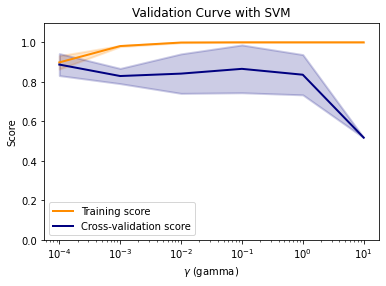

In [8]:
plt.figure()
param_range = np.logspace(-4,1,6)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, mean_train_scores, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, mean_train_scores - train_scores_std,
                mean_train_scores + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, mean_test_scores, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, mean_test_scores - test_scores_std,
                mean_test_scores + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

From the plot, we can see that a gamma of 0.1 would provide a good generalized performance on this dataset. Whereas, gamma values of 10e-4, 10e-3, and 10e-2 correspond to a model that is underfitting. Similarly, gamma values of 1 and 10 correspond to a model that is overfitting. 